LDA Classification Accuracy: 1.0


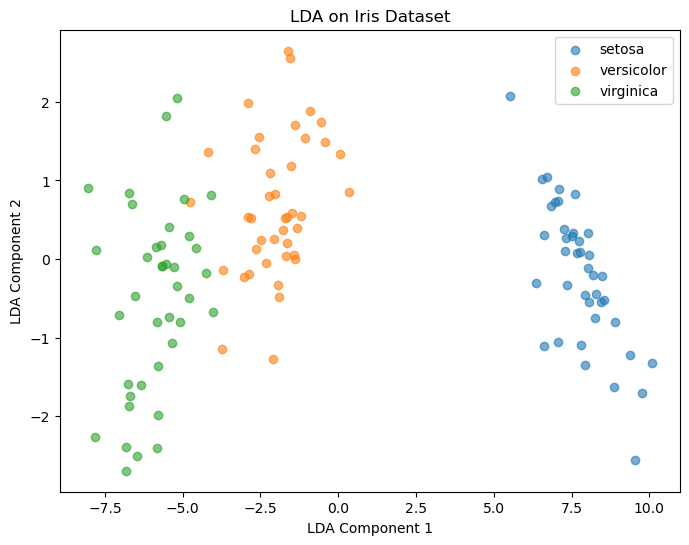

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Load dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
data = pd.read_csv(url)

# Separate features and target
X = data.drop("species", axis=1)
y = data["species"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Accuracy
y_pred = lda.predict(X_test)
print("LDA Classification Accuracy:", accuracy_score(y_test, y_pred))

# Plot the LDA transformed data
plt.figure(figsize=(8,6))
for species in data["species"].unique():
    plt.scatter(
        X_train_lda[y_train == species, 0],
        X_train_lda[y_train == species, 1],
        label=species, alpha=0.6
    )

plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA on Iris Dataset")
plt.legend()
plt.show()
